# Problem - 1

### 1.	The dataset consists of monthly totals of international airline passengers from 1995 to 2002. Our main aim is to predict the number of passengers for the next five years using time series forecasting. Prepare a document for each model explaining how many dummy variables you have created and also include the RMSE value for each model.

In [63]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [39]:
#reading the data into python
airlines = pd.read_excel(r"D:\360 Data Science 360DigiTMG\Day40-Forecasting\Datasets_Forecasting-3\Airlines Data.xlsx")
airlines.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [40]:
airlines.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


<AxesSubplot: >

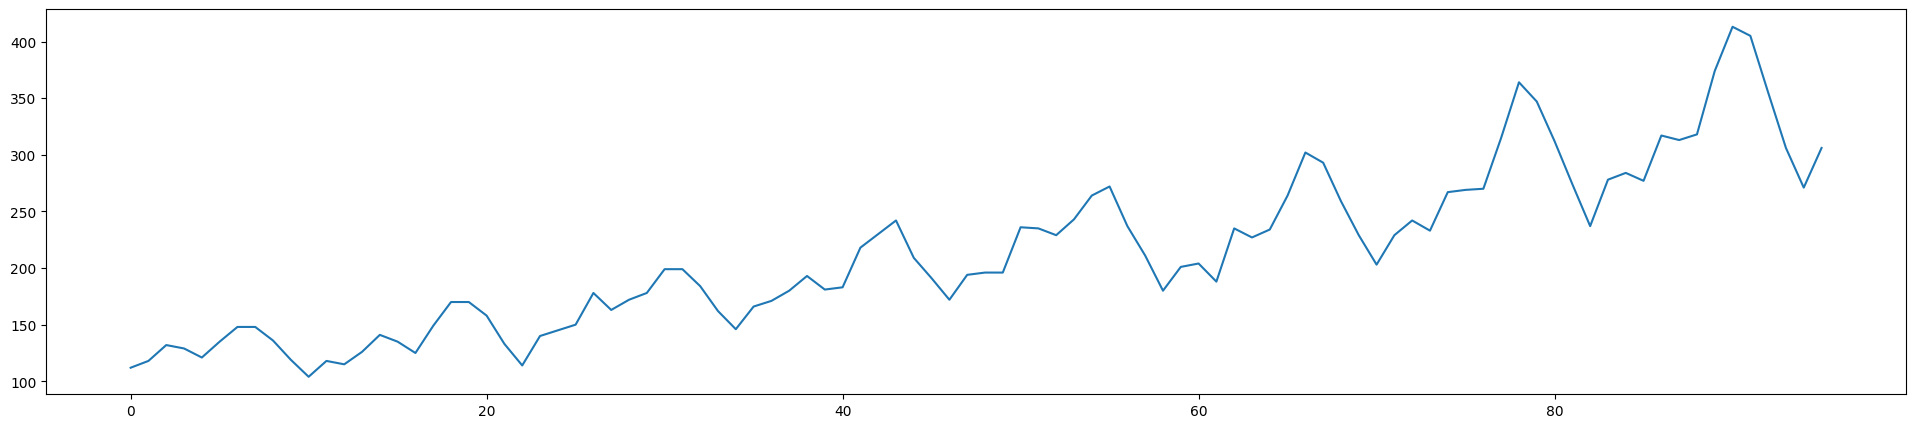

In [41]:
#plot
plt.figure(figsize=(24,5))
airlines.Passengers.plot()

<AxesSubplot: xlabel='Month', ylabel='Passengers'>

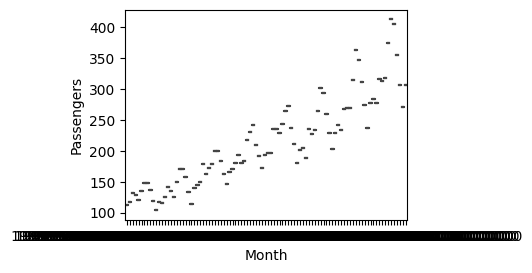

In [44]:
#boxplot
plt.figure(figsize=(8,6))
plt.subplot(221)
sns.boxplot(x='Month',y='Passengers',data=airlines)


In [48]:
# one hot encoding
month_dummies = pd.DataFrame(pd.get_dummies(airlines['Month']))

In [49]:
# concating
Air1 = pd.concat([airlines ,month_dummies],axis = 1)

# taking new values of columns of t t square and log of cum_power
Air1["t"] = np.arange(1,97)

Air1["t_square"] = Air1["t"]*Air1["t"]

Air1["log_Passengers"] = np.log(Air1["Passengers"])

In [50]:
# Data Partition
Train = Air1.head(84)
Test = Air1.tail(12)

In [51]:
####################### L I N E A R ##########################
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers ~ t', data = Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers']) - np.array(pred_linear))**2))
rmse_linear

53.19923653480271

In [52]:
##################### Exponential ##############################

Exp = smf.ols('log_Passengers ~ t', data = Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers']) - np.array(np.exp(pred_Exp)))**2))
rmse_Exp

46.05736110315635

In [53]:
#################### Quadratic ###############################

Quad = smf.ols('Passengers ~ t + t_square', data = Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t", "t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers']) - np.array(pred_Quad))**2))
rmse_Quad

48.05188897933164

In [54]:
################### Additive seasonality ########################

add_sea = smf.ols('Passengers ~ Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov', data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers']) - np.array(pred_add_sea))**2))
rmse_add_sea

132.81978481421814

In [55]:
################## Multiplicative Seasonality ##################

Mul_sea = smf.ols('log_Passengers ~ Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers']) - np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

140.06320204708626

In [56]:
################## Additive Seasonality Quadratic Trend ############################

add_sea_Quad = smf.ols('Passengers ~ t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad 

26.360817612095165

In [57]:
################## Multiplicative Seasonality Linear Trend  ###########

Mul_Add_sea = smf.ols('log_Passengers ~ t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

10.519172544323894

In [58]:
############################### Testing #######################################

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse = pd.DataFrame(data)
table_rmse

,MODEL,RMSE_Values
0,rmse_linear,53.199237
1,rmse_Exp,46.057361
2,rmse_Quad,48.051889
3,rmse_add_sea,132.819785
4,rmse_add_sea_quad,26.360818
5,rmse_Mult_sea,140.063202
6,rmse_Mult_add_sea,10.519173


# Problem - 2

### 2.	The dataset consists of quarterly sales data of Coca-Cola from 1986 to 1996. Predict sales for the next two years by using time series forecasting and prepare a document for each model explaining how many dummy variables you have created and also include the RMSE value for each model.

In [65]:
#importing required libraries
import numpy as np
import pandas as ps
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import SimpleExpSmoothing,ExponentialSmoothing,Holt
from statsmodels.tsa.seasonal import seasonal_decompose

In [66]:
#reading the data into python
cocacola = pd.read_excel(r"D:\360 Data Science 360DigiTMG\Day40-Forecasting\Datasets_Forecasting-3\CocaCola_Sales_Rawdata.xlsx")
cocacola.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


<AxesSubplot: >

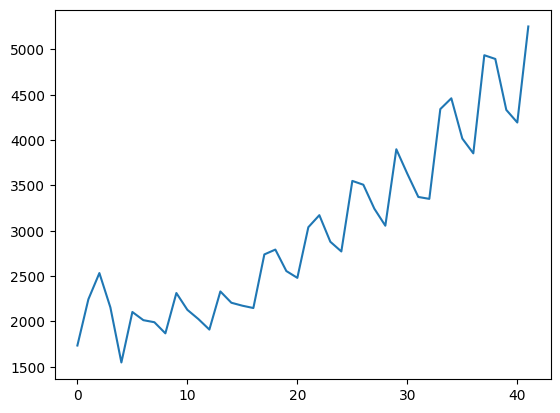

In [67]:
#time series plot
cocacola.Sales.plot()

In [68]:
#split the data into train and split
Train = cocacola.head(38)
Test = cocacola.tail(4)

In [69]:
print(Train)
print(Test)

   Quarter        Sales
0    Q1_86  1734.827000
1    Q2_86  2244.960999
2    Q3_86  2533.804993
3    Q4_86  2154.962997
4    Q1_87  1547.818996
5    Q2_87  2104.411995
6    Q3_87  2014.362999
7    Q4_87  1991.746998
8    Q1_88  1869.049999
9    Q2_88  2313.631996
10   Q3_88  2128.320000
11   Q4_88  2026.828999
12   Q1_89  1910.603996
13   Q2_89  2331.164993
14   Q3_89  2206.549995
15   Q4_89  2173.967995
16   Q1_90  2148.278000
17   Q2_90  2739.307999
18   Q3_90  2792.753998
19   Q4_90  2556.009995
20   Q1_91  2480.973999
21   Q2_91  3039.522995
22   Q3_91  3172.115997
23   Q4_91  2879.000999
24   Q1_92  2772.000000
25   Q2_92  3550.000000
26   Q3_92  3508.000000
27   Q4_92  3243.859993
28   Q1_93  3056.000000
29   Q2_93  3899.000000
30   Q3_93  3629.000000
31   Q4_93  3373.000000
32   Q1_94  3352.000000
33   Q2_94  4342.000000
34   Q3_94  4461.000000
35   Q4_94  4017.000000
36   Q1_95  3854.000000
37   Q2_95  4936.000000
   Quarter   Sales
38   Q3_95  4895.0
39   Q4_95  4333.0
40   Q1

In [70]:
#creating a fo=unction to calculate MAPE value for test data
def MAPE(pred, orig):
    temp = np.abs((pred-orig)/orig)*100
    return np.mean(temp)

In [74]:
#moving average for time series
mov_pred = cocacola['Sales'].rolling(4).mean()
mov_pred.tail(4)
MAPE(mov_pred.tail(4), Test.Sales)

8.525442688640576

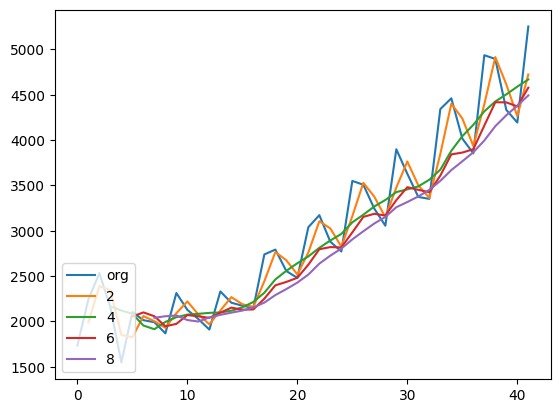

In [77]:
#plot with moving average
cocacola.Sales.plot(label='org')

for i in range(2, 9, 2):
    cocacola['Sales'].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)

0             NaN
1             NaN
2     2143.762997
3     2102.818371
4     2020.319496
5     1934.987247
6     1954.739122
7     2021.045498
8     2061.442623
9     2080.072498
10    2089.651998
11    2097.037872
12    2109.008246
13    2137.179370
14    2185.280995
15    2266.008121
16    2390.301497
17    2511.332248
18    2600.674498
19    2679.788372
20    2764.735497
21    2852.529622
22    2929.281748
23    3029.469624
24    3135.264750
25    3222.857624
26    3303.964998
27    3383.089998
28    3441.839998
29    3473.107499
30    3526.250000
31    3618.625000
32    3778.000000
33    3962.500000
34    4105.750000
35    4242.750000
36    4371.250000
37    4465.000000
38    4547.000000
39    4629.125000
40            NaN
41            NaN
Name: trend, dtype: float64
0    -345.292772
1     287.697338
2     192.544292
3    -134.948858
4    -345.292772
5     287.697338
6     192.544292
7    -134.948858
8    -345.292772
9     287.697338
10    192.544292
11   -134.948858
12   -345.29

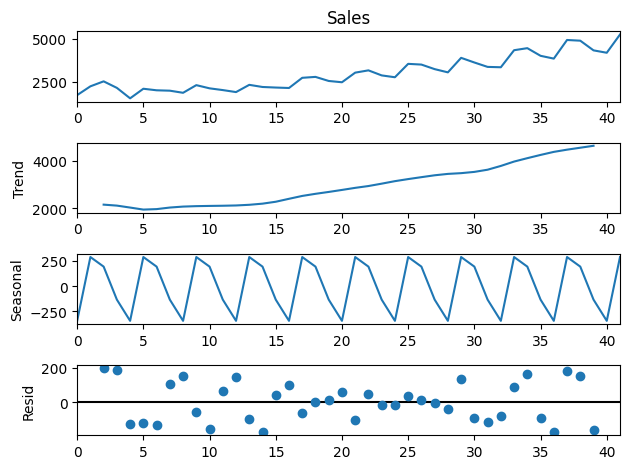

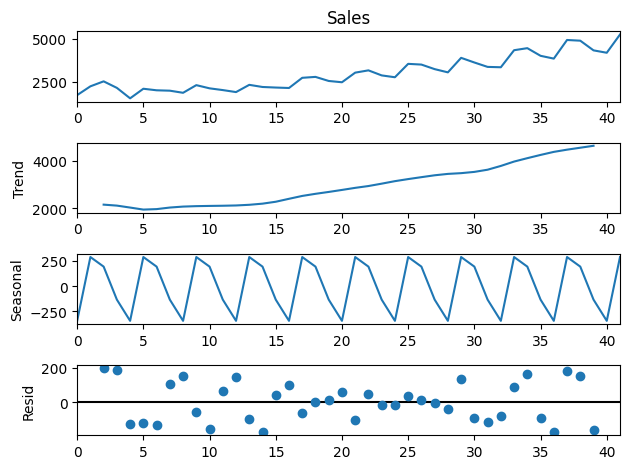

In [80]:
#time series decomposition is the process of seperating the data into its core concepts
#time series decompsition plot using moving average
#additive decomposition
add_res= seasonal_decompose(cocacola.Sales, model='additive', period=4)
print(add_res.trend)
print(add_res.seasonal)
print(add_res.resid)
print(add_res.observed)
add_res.plot()

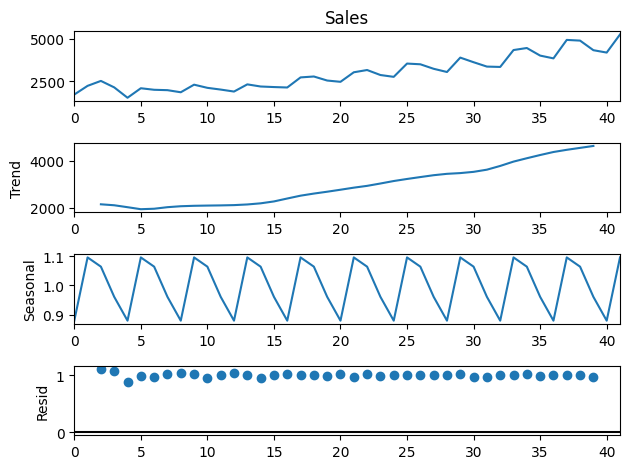

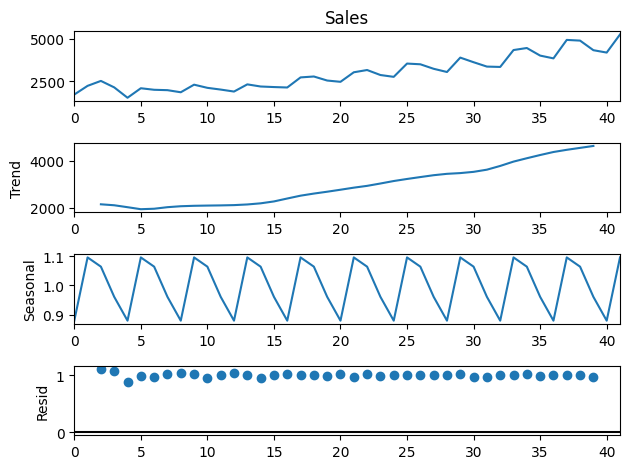

In [81]:
mul_res = seasonal_decompose(cocacola.Sales, model='multiplicative', period=4)
mul_res.plot()

In [83]:
#acf and pacf plot on oringinal data set
import statsmodels.graphics.tsaplots as tsa_plots

C:\Users\J. Berger Perkins\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


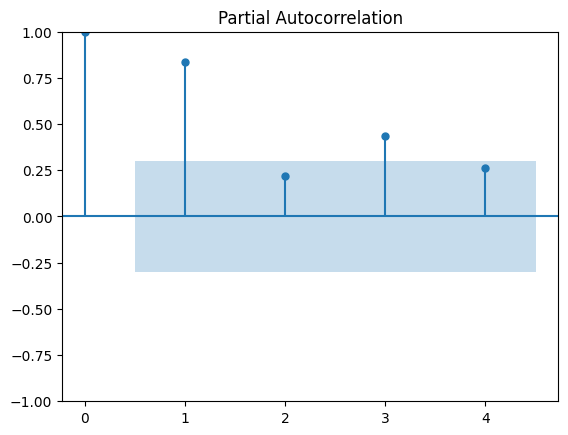

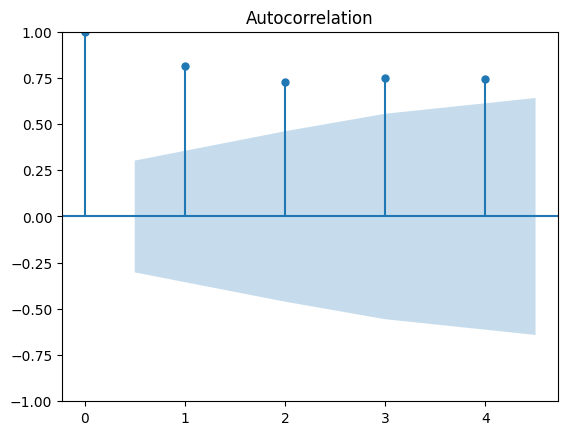

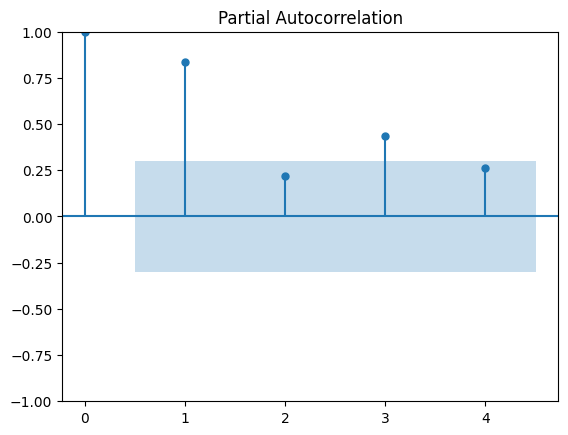

In [84]:
tsa_plots.plot_acf(cocacola.Sales, lags=4)
tsa_plots.plot_pacf(cocacola.Sales, lags=4)

In [90]:
#simple exponential smoothnening
simp_model = SimpleExpSmoothing(Train["Sales"]).fit()
pred_simp = simp_model.predict(start= Test.index[0], end= Test.index[-1])
se = MAPE(pred_simp, Test.Sales)
se

8.373345059147068

In [91]:
#holt method
holt_model = Holt(Train['Sales']).fit()
pred_holt = holt_model.predict(start=Test.index[0], end=Test.index[-1])
hm = MAPE(pred_holt, Test.Sales)
hm

10.50648347900432

In [92]:
# Holts winter exponential smoothing with additive seasonality and additive trend
holt_model_add = ExponentialSmoothing(Train['Sales'], trend='add',seasonal='add',seasonal_periods=4).fit()
pred_holt_model = holt_model_add.predict(start=Test.index[0], end=Test.index[-1])
hwm = MAPE(pred_holt_model, Test.Sales)
hwm

1.5022789537440098

In [93]:
# Holts winter exponential smoothing with multiplicative seasonality and additive trend
holt_model_mul = ExponentialSmoothing(Train["Sales"], seasonal = "mul", trend = "add", seasonal_periods = 4).fit()
pred_holt_mul = holt_model_mul.predict(start = Test.index[0], end = Test.index[-1])
ham = MAPE(pred_holt_mul, Test.Sales) 
ham

2.0448970390908947

In [94]:
# checking rmse value for all

data = {"MODEL":pd.Series(["Simple Exponential","Holt","Holt add","Holt exp"]),
        "RMSE_Values":pd.Series([se,hm,hwm,ham])}
table_rmse = pd.DataFrame(data)
table_rmse

,MODEL,RMSE_Values
0,Simple Exponential,8.373345
1,Holt,10.506483
2,Holt add,1.502279
3,Holt exp,2.044897


# Problem - 3

### 3.	A plastics manufacturing plant has recorded their monthly sales data from 1949 to 1953. Perform forecasting on the data and bring out insights from it and forecast the sale for the next year. 

In [100]:
#importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from math import sqrt
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.graphics.tsaplots as tsa_plots
from sklearn.metrics import mean_squared_error

In [102]:
#reading thedata into pytyhon
plastic = pd.read_csv(r"D:\360 Data Science 360DigiTMG\Day40-Forecasting\Datasets_Forecasting-3\PlasticSales.csv")
plastic.head()

,Month,Sales
0,Jan-49,742
1,Feb-49,697
2,Mar-49,776
3,Apr-49,898
4,May-49,1030


In [104]:
Train  = plastic.head(48)
Test = plastic.head(12)

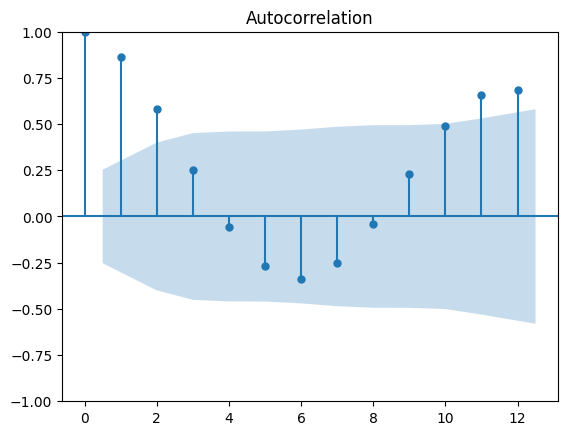

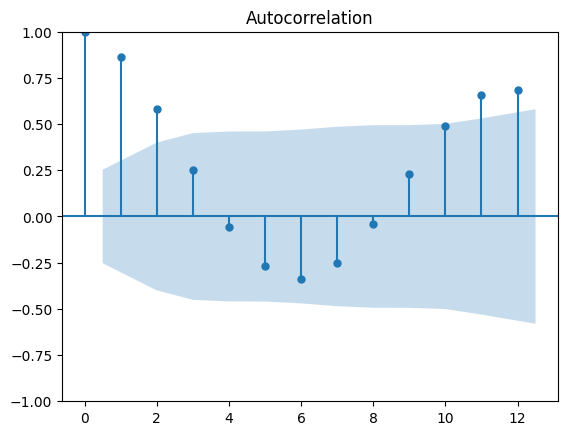

In [105]:
#acf plot
tsa_plots.plot_acf(plastic.Sales, lags=12)

C:\Users\J. Berger Perkins\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


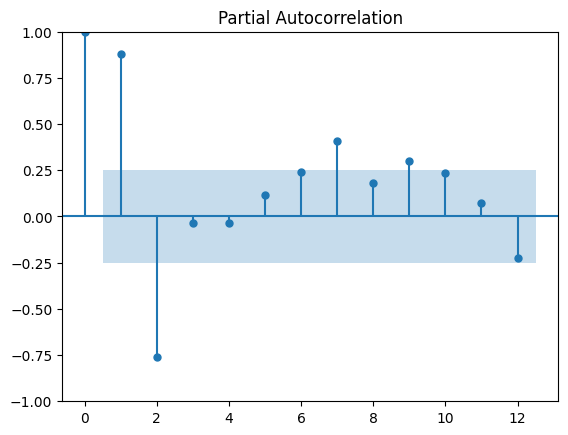

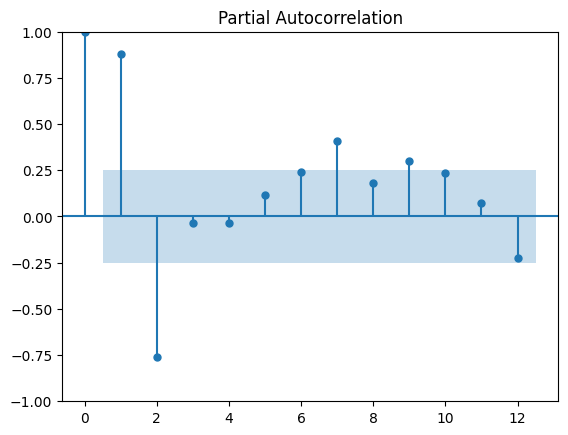

In [106]:
#pacf plot
tsa_plots.plot_pacf(plastic.Sales, lags=12)

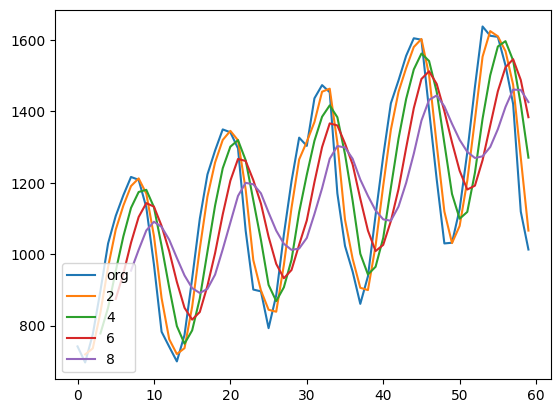

In [107]:
plastic.Sales.plot(label='org')
for i in range(2,9,2):
    plastic.Sales.rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)

In [108]:
#arima
model1 = ARIMA(Train.Sales, order=(1,1,8))
res1 = model1.fit()
print(res1.summaryary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   48
Model:                 ARIMA(1, 1, 8)   Log Likelihood                -266.120
Date:                Sun, 15 Jan 2023   AIC                            552.241
Time:                        19:02:24   BIC                            570.742
Sample:                             0   HQIC                           559.203
                                 - 48                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6091      0.369      1.649      0.099      -0.115       1.333
ma.L1         -0.1878     38.745     -0.005      0.996     -76.126      75.751
ma.L2         -0.0210     85.648     -0.000      1.0

C:\Users\J. Berger Perkins\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [110]:
#forecast for next 12 months
start_index = len(Train)
end_index = start_index + 11
forecast_test = res1.predict(start= start_index, end = end_index)
print(forecast_test)

48    1045.991744
49     963.876563
50    1051.852127
51    1169.455561
52    1293.913048
53    1409.858045
54    1419.055078
55    1381.790869
56    1359.094618
57    1345.271171
58    1336.851821
59    1331.723907
Name: predicted_mean, dtype: float64


In [113]:
#evaluate forecast
rmse_test = sqrt(mean_squared_error(Test.Sales, forecast_test))
print('Test RMSE : %3f' % rmse_test)

Test RMSE : 298.678685


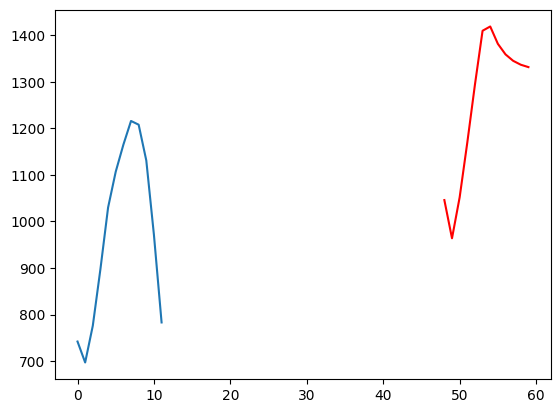

In [114]:
#plot forecast against actual outcomes
pyplot.plot(Test.Sales)
pyplot.plot(forecast_test,color='red')
pyplot.show()

In [116]:
# Auto-ARIMA - Automatically discover the optimal order for an ARIMA model.
#pip install pmdarima --user
import pmdarima as pm

In [117]:
ar_model = pm.auto_arima(Train.Sales, start_p=0, start_q=0,
                      max_p=12, max_q=12, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, trace=True,
                      error_action='warn', stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=587.221, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=562.963, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=568.322, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=585.544, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=563.017, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=563.857, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=560.963, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=561.027, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=561.858, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=566.446, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=548.494, Time=0.29 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=546.129, Time=0.30 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=559.256, Time=0.08 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=544.724, 

In [118]:
# Best Parameters ARIMA
# ARIMA with AR=6, I = 1, MA = 2
model = ARIMA(Train.Sales, order = (6,1,2))
res = model.fit()
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   48
Model:                 ARIMA(6, 1, 2)   Log Likelihood                -256.347
Date:                Sun, 15 Jan 2023   AIC                            530.694
Time:                        19:22:55   BIC                            547.345
Sample:                             0   HQIC                           536.960
                                 - 48                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5192      0.133     11.400      0.000       1.258       1.780
ar.L2         -1.0365      0.277     -3.738      0.000      -1.580      -0.493
ar.L3          0.1728      0.312      0.553      0.5

C:\Users\J. Berger Perkins\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [119]:
# Forecast for next 12 months
start_index = len(Train)
end_index = start_index + 11
forecast_best = res1.predict(start=start_index, end=end_index)

print(forecast_best)

48    1045.991744
49     963.876563
50    1051.852127
51    1169.455561
52    1293.913048
53    1409.858045
54    1419.055078
55    1381.790869
56    1359.094618
57    1345.271171
58    1336.851821
59    1331.723907
Name: predicted_mean, dtype: float64


In [120]:
# Evaluate forecasts
rmse_best = sqrt(mean_squared_error(Test.Sales, forecast_best))
print('Test RMSE: %.3f' % rmse_best)

Test RMSE: 298.679


In [121]:
# Forecast for future 12 months
start_index = len(plastic)
end_index = start_index + 11
forecast = res.predict(start=start_index, end=end_index)
print(forecast)

60    1124.465046
61    1050.760709
62    1050.096013
63    1123.961764
64    1253.754093
65    1405.107933
66    1537.714363
67    1616.690509
68    1621.684595
69    1551.687028
70    1425.007231
71    1274.626692
Name: predicted_mean, dtype: float64


# Problrm - 4

### 4.	Solar power consumption has been recorded by city councils at regular intervals. The reason behind doing so is to understand how businesses are using solar power so that they can cut down on nonrenewable sources of energy and shift towards renewable energy. Based on the data, build a forecasting model and provide insights on it. 

In [123]:
# importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [129]:
import warnings
warnings.filterwarnings('ignore')

In [124]:
# importing dataset to the python
solar = pd.read_csv(r"D:\360 Data Science 360DigiTMG\Day40-Forecasting\Datasets_Forecasting-3\solarpower_cumuldaybyday2.csv")

In [125]:
# info function for the dtypes and checking the null values
solar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2558 entries, 0 to 2557
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       2558 non-null   object 
 1   cum_power  2558 non-null   float64
dtypes: float64(1), object(1)
memory usage: 40.1+ KB


In [126]:
# arithematics calculations
solar.describe()

,cum_power
count,2558.000000
mean,13461.057349
std,8129.192104
min,0.100000
25%,6665.350000
50%,13000.500000
75%,20183.750000
max,28120.000000


<AxesSubplot: >

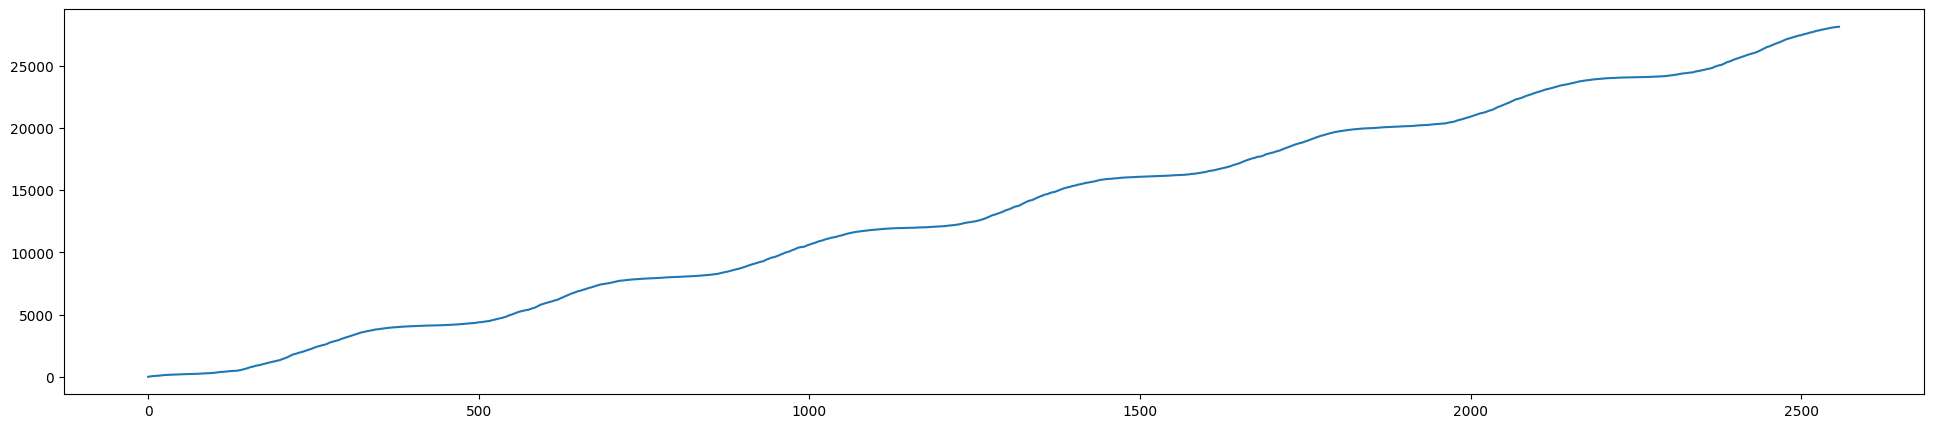

In [127]:
# Visualization
plt.figure(figsize=(24,5))
solar.cum_power.plot()

In [130]:
# Extracting Day, weekday name, month name, year from the Date column using 

solar['date'] = pd.to_datetime(solar['date'])
                               
                              
solar['year'] = pd.DatetimeIndex(solar['date']).year
solar['month'] = pd.DatetimeIndex(solar['date']).month
solar['day'] = pd.DatetimeIndex(solar['date']).day

In [131]:
# mapping name to them month columns
solar.month = solar.month.map({1:'Jan', 2: 'Feb',3: 'Mar',4:'Apr',
                               5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',
                               10:'Oct',11:'Nov',12:'Dec'})

In [132]:
# Pre processing

solar["t"] = np.arange(1,2559)
solar["t_square"] = solar["t"] * solar["t"]
solar["log_cum_power"] = np.log(solar["cum_power"])
solar.columns

Index(['date', 'cum_power', 'year', 'month', 'day', 't', 't_square',
       'log_cum_power'],
      dtype='object')

In [133]:
# one hot encoding
month_dummies = pd.DataFrame(pd.get_dummies(solar['month']))

In [134]:
# concat
sol1 = pd.concat([solar,month_dummies],axis = 1)

In [135]:
# Data Partition
Train = sol1.head(2193)
Test = sol1.tail(365)

In [136]:
####################### L I N E A R ##########################

import statsmodels.formula.api as smf 

linear_model = smf.ols('cum_power ~ t', data = Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['cum_power']) - np.array(pred_linear))**2))
rmse_linear

441.2128945378351

In [137]:
##################### Exponential ##############################

Exp = smf.ols('log_cum_power ~ t', data = Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['cum_power']) - np.array(np.exp(pred_Exp)))**2))
rmse_Exp

37012.42218981042

In [138]:
#################### Quadratic ###############################

Quad = smf.ols('cum_power ~ t + t_square', data = Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t", "t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['cum_power']) - np.array(pred_Quad))**2))
rmse_Quad

465.49251670932836

In [139]:
################### Additive seasonality ########################

add_sea = smf.ols('cum_power ~ Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov', data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['cum_power']) - np.array(pred_add_sea))**2))
rmse_add_sea

14096.331668808953

In [140]:
################## Multiplicative Seasonality ##################

Mul_sea = smf.ols('log_cum_power ~ Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['cum_power']) - np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

17773.134528913604

In [141]:
################## Additive Seasonality Quadratic Trend ############################

add_sea_Quad = smf.ols('cum_power ~ t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['cum_power'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad 

377.48133545977447

In [142]:
################## Multiplicative Seasonality Linear Trend  ###########

Mul_Add_sea = smf.ols('log_cum_power ~ t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['cum_power'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

37550.211252940615

In [143]:
############################### Testing #######################################

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse = pd.DataFrame(data)
table_rmse

,MODEL,RMSE_Values
0,rmse_linear,441.212895
1,rmse_Exp,37012.422190
2,rmse_Quad,465.492517
3,rmse_add_sea,14096.331669
4,rmse_add_sea_quad,377.481335
5,rmse_Mult_sea,17773.134529
6,rmse_Mult_add_sea,37550.211253
